<a href="https://colab.research.google.com/github/MariMurotani/ColabNotebooks/blob/main/ImageEnhance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Sat Jul 26 05:23:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/ImageEnhance

/content/drive/MyDrive/Colab Notebooks/ImageEnhance


In [5]:
#!model_zoo
#!wget https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/006_colorCAR_DFWB_s126w7_SwinIR-M_jpeg10.pth -P model_zoo/
#!wget https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/006_colorCAR_DFWB_s126w7_SwinIR-M_jpeg40.pth -P model_zoo/
#!wget https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/005_colorDN_DFWB_s128w8_SwinIR-M_noise15.pth -P model_zoo/
#!wget https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/005_colorDN_DFWB_s128w8_SwinIR-M_noise50.pth -P model_zoo/
#!wget https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/001_classicalSR_DF2K_s64w8_SwinIR-M_x2.pth -P model_zoo/

In [6]:
!git clone https://github.com/ming053l/DRCT.git
%cd DRCT

fatal: destination path 'DRCT' already exists and is not an empty directory.
/content/drive/MyDrive/Colab Notebooks/ImageEnhance/DRCT


In [7]:
!pip install -r requirements.txt
!pip install basicsr timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 119.5 MB/s eta 0:00:

In [8]:
#!wget https://github.com/ming053l/DRCT/releases/download/v1.0/DRCT_L_X4.pth -O model_zoo/DRCT_L_X4.pth

In [9]:
%cd /content/drive/MyDrive/Colab Notebooks/ImageEnhance

/content/drive/MyDrive/Colab Notebooks/ImageEnhance


In [10]:
!pip install opencv-python

In [11]:
!git clone https://github.com/JingyunLiang/SwinIR

fatal: destination path 'SwinIR' already exists and is not an empty directory.


In [14]:
!git clone https://github.com/ming053l/DRCT

fatal: destination path 'DRCT' already exists and is not an empty directory.


In [48]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import seaborn as sns
from scipy.ndimage import map_coordinates
from typing import (
    Any,
    Callable,
    Dict,
    List,
    Optional,
    Tuple,
    Union,
    Iterable,
    Generator,
    Sequence,
    TypeVar,
    Literal
)
import torch
from torchvision import transforms
from PIL import Image, ImageEnhance
import numpy as np
from scipy.interpolate import PchipInterpolator
import gc
from concurrent.futures import ThreadPoolExecutor
import sys
sys.path.append("SwinIR")
from models.network_swinir import SwinIR

sys.path.append("DRCT")
from torchvision.transforms.functional import to_tensor, to_pil_image
from drct.archs.DRCT_arch import DRCT

from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation

In [16]:
def load_swinir_model_custom(model_path):
    model = SwinIR(
        upscale=2,
        in_chans=3,
        img_size=64,
        window_size=8,
        img_range=1.0,
        depths=[6]*6,
        embed_dim=180,
        num_heads=[6]*6,
        mlp_ratio=2,
        upsampler='pixelshuffle',
        resi_connection='1conv'
    )
    state_dict = torch.load(model_path, map_location='cpu')

    if 'params' in state_dict:
        model.load_state_dict(state_dict['params'], strict=True)
    else:
        model.load_state_dict(state_dict, strict=True)
    model = model.to("cuda")
    model.eval()
    return model

model_scale = load_swinir_model_custom(
    'model_zoo/001_classicalSR_DF2K_s64w8_SwinIR-M_x2.pth'
)

/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [17]:
def load_swinir_denoise_model(model_path):
    model = SwinIR(
        upscale=1,
        in_chans=3,
        img_size=128,
        window_size=8,
        img_range=1.0,
        depths=[6, 6, 6, 6, 6, 6],
        embed_dim=180,  # ← ここがポイント
        num_heads=[6, 6, 6, 6, 6, 6],
        mlp_ratio=2,
        upsampler='',
        resi_connection='1conv'
    )

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    state_dict = torch.load(model_path, map_location=device)

    if 'params' in state_dict:
        state_dict = state_dict['params']

    model.load_state_dict(state_dict, strict=True)
    model = model.to(device)
    model.eval()
    return model

model_denoise = load_swinir_denoise_model(
  'model_zoo/005_colorDN_DFWB_s128w8_SwinIR-M_noise15.pth'
)

In [18]:
def load_drct_model(ckpt_path: str):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    # set up model (DRCT-L)
    model = DRCT(upscale=4, in_chans=3,  img_size= 64, window_size= 16, compress_ratio= 3,squeeze_factor= 30,
                        conv_scale= 0.01, overlap_ratio= 0.5, img_range= 1., depths= [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
                        embed_dim= 180, num_heads= [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], gc= 32,
                        mlp_ratio= 2, upsampler= 'pixelshuffle', resi_connection= '1conv')

    model.load_state_dict(torch.load(ckpt_path)['params'], strict=True)
    model.eval()
    model = model.to(device)
    return model

drct_model = load_drct_model("model_zoo/DRCT-L_X4.pth")

In [19]:
def load_segmentation_model(ckpt_path: str):
  extractor = SegformerFeatureExtractor.from_pretrained(ckpt_path)
  model = SegformerForSemanticSegmentation.from_pretrained(ckpt_path)
  return model, extractor

seg_model, seg_extractor = load_segmentation_model("nvidia/segformer-b0-finetuned-ade-512-512")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/segformer/feature_extraction_segformer.py:30: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/utils/deprecation.py:172: UserWarning: The following named arguments are not valid for `SegformerFeatureExtractor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

In [20]:
def infer_swinir(model, image_np):
    """
    SwinIRモデルで画像を推論し、結果をNumPy配列として返す。
    """
    device = next(model.parameters()).device  # モデルが存在するdeviceを取得
    img = transforms.ToTensor()(Image.fromarray(image_np)).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img).clamp(0, 1)

    out_img = output.squeeze().permute(1, 2, 0).cpu().numpy()
    out_img = (out_img * 255.0).round().astype(np.uint8)

    return out_img

In [21]:
def infer_swinir_denoise(model, image_np):
    """
    SwinIRノイズ除去モデルで画像を推論し、結果をNumPy配列として返す。
    """
    # 入力検査と前処理
    if image_np.dtype != np.uint8:
        image_np = np.clip(image_np, 0, 255).astype(np.uint8)
    if image_np.ndim != 3 or image_np.shape[2] != 3:
        raise ValueError(f"Expected image with shape (H, W, 3), got {image_np.shape}")
    if image_np.shape[0] < 2 or image_np.shape[1] < 2:
        raise ValueError(f"Image too small for processing: {image_np.shape}")

    device = next(model.parameters()).device
    img = transforms.ToTensor()(Image.fromarray(image_np)).unsqueeze(0).to(device)

    # 推論
    with torch.no_grad():
        output = model(img).clamp(0, 1)

    out_img = output.squeeze().permute(1, 2, 0).cpu().numpy()
    out_img = (out_img * 255.0).round().astype(np.uint8)
    return out_img

In [22]:
def infer_drct_on_image(model, input_image_np, device="cuda"):
    """
    DRCTモデルによる画像推論（float32正規化 → NCHWテンソル → 出力を255スケールに戻して返す）
    """
    img = input_image_np.astype(np.float32) / 255.0 #<- 正規化をする
    img_tensor = torch.from_numpy(img.transpose(2, 0, 1)).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img_tensor)

    output = output.squeeze(0).clamp(0, 1).cpu().numpy()
    output = np.transpose(output, (1, 2, 0))  # C×H×W → H×W×C
    output = (output * 255.0).round().astype(np.uint8) #<- 正規化を戻す
    return output

In [23]:
def resize_to_target(img, target_width=1712):
    h, w = img.shape[:2]
    max_dim = max(h, w)

    if max_dim > target_width * 4:
        # 縮小
        scale = target_width / max_dim
        interpolation = cv2.INTER_AREA
    else:
        # 拡大
        scale = target_width / max_dim
        interpolation = cv2.INTER_CUBIC

    new_size = (int(w * scale), int(h * scale))
    resized = cv2.resize(img, new_size, interpolation=interpolation)

    return resized

In [24]:
def sharpen_image(img, alpha=1.0):
    """
    シャープネス処理を行う関数。

    Parameters:
        img: 入力画像 (NumPy 配列, RGB)
        alpha: シャープネス強度（通常は 0.5〜1.5）

    Returns:
        シャープ処理後の画像
    """
    blurred = cv2.GaussianBlur(img, (0, 0), sigmaX=1.0)
    sharpened = cv2.addWeighted(img, 1 + alpha, blurred, -alpha, 0)
    return np.clip(sharpened, 0, 255).astype(np.uint8)

In [25]:
def denoise_with_opencv(img, h=10):
    """
    OpenCVの非局所平均を使った軽めのノイズ除去
    h: フィルタの強さ（大きいほど強力）
    """
    return cv2.fastNlMeansDenoisingColored(img, None, h, h, 7, 21)

In [26]:
# グレースケール化してヒストグラム取得（露出判定用）
def calc_image_hist(img_color):
  """
  カラー画像からグレースケール変換を行い、ヒストグラムを計算して
  最も頻度の高い輝度値（ピーク値）を返す関数。

  Parameters:
  - img_color: np.ndarray
      BGR形式のカラー画像（OpenCVで読み込んだ画像）

  Returns:
  - peak: int
      グレースケール画像のヒストグラムにおける最大頻度の輝度値（0〜255）
  - hist: np.ndarray
      輝度ヒストグラム（256次元の1次元配列）
  - lift_amoubt: int
      輝度ヒストグラム（256次元の1次元配列）
  """
  gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist([gray], [0], None, [256], [0, 256]).flatten()
  peak = np.argmax(hist[0:220])
  lift_amount = compute_adaptive_lift(gray, peak)

  return peak, hist, lift_amount

In [27]:
def compute_adaptive_lift(gray_img: np.ndarray, peak: int, max_lift=60, min_lift=10) -> int:
    """
    輝度画像に基づいて白飛びを抑えるリフト量を決定

    Parameters:
    - gray_img: グレースケール画像（0〜255）
    - peak: ヒストグラムピーク値
    - max_lift: 最大リフト量（デフォルト: 60）
    - min_lift: 最小リフト量（デフォルト: 10）

    Returns:
    - lift_amount: 推定されたリフト量
    """
    # 上位5%輝度の中央値をとる
    high_percentile_value = np.percentile(gray_img, 95)

    # 明るさを正規化（128〜255の範囲）
    norm = np.clip((high_percentile_value - 128) / (255 - 128), 0, 1)

    # 明るいほどリフトを減らす（暗いときほど持ち上げる）
    weight = 1.0 - norm

    lift_amount = int(min_lift + (max_lift - min_lift) * weight)
    print(f"[AdaptiveLift] 95th percentile={high_percentile_value:.1f}, weight={weight:.2f}, lift_amount={lift_amount}")

    return lift_amount

In [28]:
def find_valley_in_range(image: np.ndarray, min_val: int = 50, max_val: int = 200,
                         smooth_kernel_size: int = 5) -> Tuple[int, np.ndarray, np.ndarray]:
    """
    グレースケール画像のヒストグラムから、指定範囲内の谷（最小値）を探してインデックス（輝度値）を返す。

    Parameters:
    - image: 画像 (np.ndarray)
    - min_val: 検索範囲の下限（輝度）
    - max_val: 検索範囲の上限（輝度）
    - smooth_kernel_size: 平滑化のカーネルサイズ

    Returns:
    - 輝度の谷位置（int）
    """
    # ヒストグラム生成・平滑化
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()

    # 指定範囲の最小値インデックス
    valley_range = hist[min_val:max_val]
    valley_index = int(np.argmin(valley_range) + min_val)

    # マスク作成（上位10%の明るい領域を1に）
    # 画像の谷の部分
    mask = np.where(gray >= valley_index, 255, 0).astype(np.uint8)

    return valley_index, mask, hist

In [29]:
def show_sampled_image(hist, lut, peak, lift_amount, img_color, adjusted_color, sharpend_cv):
  # トーンカーブ表示を2番目の軸（axes[1]）に埋め込むように変更
  fig, axes = plt.subplots(1, 4, figsize=(18, 5))

  # 0: 元画像
  axes[0].imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
  axes[0].set_title("Original")
  axes[0].axis("off")

  # 1: ヒストグラムとトーンカーブの重ね描き
  axes[1].bar(np.arange(256), hist / hist.max() * 255, color='gray', alpha=0.6, label='Histogram')
  axes[1].plot(np.arange(256), lut, color='blue', label='Tone Curve')
  axes[1].plot([0, 255], [0, 255], '--', color='black', linewidth=1, label='Identity')
  axes[1].set_title(f"Histogram & Tone Curve (peak: {peak})")
  axes[1].plot(peak, peak+lift_amount, 'ro', label='Control Points')
  axes[1].legend()
  axes[1].set_xlim([0, 255])
  axes[1].set_ylim([0, 255])
  axes[1].grid(True)

  # 2: トーンカーブ補正後画像
  axes[2].imshow(cv2.cvtColor(adjusted_color, cv2.COLOR_BGR2RGB))
  axes[2].set_title(f"Tone Curve Adjusted")
  axes[2].axis("off")

  # 3: シャープ化画像（仮）
  axes[3].imshow(cv2.cvtColor(sharpend_cv, cv2.COLOR_BGR2RGB))
  axes[3].set_title("Sharpened")
  axes[3].axis("off")

  plt.tight_layout()
  plt.show()

In [30]:
def apply_tone_curve_by_peak(img_bgr: np.ndarray, peak: int, lift_amount: int = 50, interpolation: str = 'pchip') -> np.ndarray:
    """
    画像に対して、輝度ヒストグラムのピーク位置を中心にトーンカーブ補正を行い、
    トーンカーブとヒストグラムをオーバーレイ表示する。

    Parameters:
    - img_bgr: 入力画像（BGR形式）
    - peak: ヒストグラムのピーク位置（0〜255）
    - lift_amount: ピークに対して持ち上げる量（デフォルトは+50）

    Returns:
    - トーンカーブ補正後のBGR画像と LUT（1次元 np.uint8 配列）
    """
    # 制御点の設定
    x = np.array([0, peak, 255])
    y = np.array([0, np.clip(peak + lift_amount, 0, 255), 255])

    # 小さい順にソート
    sort_idx = np.argsort(x)
    x_sorted = x[sort_idx]
    y_sorted = y[sort_idx]

    # 重複を除く（xがstrictly increasingになるように）
    x_unique, unique_indices = np.unique(x_sorted, return_index=True)
    y_unique = y_sorted[unique_indices]

    # トーンカーブ関数生成（PCHIP）
    pchip = PchipInterpolator(x_unique, y_unique)

    # LUT生成
    curve = pchip(np.arange(256))
    lut = np.clip(curve, 0, 255).astype(np.uint8)

    # トーンカーブ補正適用
    channels = cv2.split(img_bgr)
    adjusted_channels = [cv2.LUT(c, lut) for c in channels]
    adjusted_img = cv2.merge(adjusted_channels)

    return adjusted_img, lut

In [31]:
def split_tiles(img, tile_size=512, overlap=64):
    h, w = img.shape[:2]
    stride = tile_size - overlap
    tiles = []

    for y in range(0, h, stride):
        for x in range(0, w, stride):
            y1, x1 = y, x
            y2 = min(y1 + tile_size, h)
            x2 = min(x1 + tile_size, w)

            tile = img[y1:y2, x1:x2]

            # 足りない部分をパディング
            pad_bottom = tile_size - tile.shape[0]
            pad_right = tile_size - tile.shape[1]
            if pad_bottom > 0 or pad_right > 0:
                tile = cv2.copyMakeBorder(tile, 0, pad_bottom, 0, pad_right,
                                          borderType=cv2.BORDER_REFLECT_101)
            tiles.append(((y1, x1), tile))

    return tiles

In [32]:
def process_image_with_swinir_parallel(img, tile_size=256, overlap=42, scale=4, max_workers=3):
    """
    画像をタイル分割して並列でSwinIR系モデル（例: DRCT）を推論し、オプションでDenoise処理し、再結合する。

    Parameters:
        img (np.ndarray): 入力画像 (H, W, 3), RGB or BGR
        tile_size (int): タイル1辺のサイズ（推奨: 384）
        overlap (int): タイル間のオーバーラップ量
        scale (int): 拡大スケール（例: 2）
        max_workers (int): 並列推論のスレッド数

    Returns:
        np.ndarray: 超解像後の画像 (H*scale, W*scale, 3), dtype=uint8
    """
    tiles = split_tiles(img, tile_size, overlap)
    h, w = img.shape[:2]
    out_h, out_w = h * scale, w * scale
    result = np.zeros((out_h, out_w, 3), dtype=np.float32) # 結果格納用の配列
    count_map = np.zeros_like(result) # ピクセルごとの平均にするためcountを取得する

    tile_coords = [(y * scale, x * scale) for (y, x), _ in tiles]
    tile_imgs = [tile for _, tile in tiles]

    # 並列 Super-Resolution
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        upscaled_tiles = list(executor.map(lambda t: infer_drct_on_image(drct_model, t).astype(np.float32), tile_imgs))

    gc.collect()
    torch.cuda.empty_cache()

    # 並列 Denoise
    with ThreadPoolExecutor(max_workers=(max_workers/2)) as executor:
        denoised_tiles = list(executor.map(lambda t: infer_swinir_denoise(model_denoise, t).astype(np.float32), upscaled_tiles))
    #denoised_tiles = [infer_swinir_denoise(model_denoise, tile.astype(np.uint8)).astype(np.float32) for tile in upscaled_tiles]

    for (y, x), upscaled_tile in zip(tile_coords, denoised_tiles):
        h_target = min(result.shape[0] - y, upscaled_tile.shape[0])
        w_target = min(result.shape[1] - x, upscaled_tile.shape[1])

        tile_crop = upscaled_tile[:h_target, :w_target]

        result[y:y + h_target, x:x + w_target] += tile_crop
        count_map[y:y + h_target, x:x + w_target] += 1

    merged = np.clip(result / (count_map + 1e-6), 0, 255).astype(np.uint8)
    final = cv2.resize(merged, (w, h), interpolation=cv2.INTER_CUBIC)

    return final

In [33]:
%cd /content/drive/MyDrive/Colab Notebooks/ImageEnhance

/content/drive/MyDrive/Colab Notebooks/ImageEnhance


In [34]:
#
# Auto Image Correction
# トーンカーブを利用した画像の補正
#

In [35]:
#for entry in os.listdir("./inputs"):
for entry in ["P7016194_Original.JPG"]:
  if entry == "." or entry == "..":
    continue

  plt.show(entry)

  # おまじない
  gc.collect()
  torch.cuda.empty_cache()

  # カラー画像の読み込み
  img_path = f"inputs/{entry}"
  img_color = cv2.imread(img_path)

  # 明るさカテゴリ分類
  peak, hist, lift_amount = calc_image_hist(img_color)

  # 初期値
  adjusted_color = np.zeros((512, 512, 3), dtype=np.uint8)

  # トーンカーブ補正
  if peak < 85:
      exposure_status = "Underexposed"
      adjusted_color, lut = apply_tone_curve_by_peak(img_color, peak, lift_amount=lift_amount)
  elif peak > 170:
      print(f"peak: {peak}")
      exposure_status = "Overexposed"
      adjusted_color, lut = apply_tone_curve_by_peak(img_color, peak, lift_amount=-lift_amount)
  else:
      exposure_status = "Properly exposed"
      adjusted_color = img_color

  print(exposure_status)

  original_size = adjusted_color.shape
  # タイル上にしてアップスケーリング
  processed = process_image_with_swinir_parallel(adjusted_color)

  # シャープ
  sharpend_cv = sharpen_image(processed, alpha=0.2)
  sharpend_cv = cv2.resize(sharpend_cv, (original_size[1], original_size[0]), interpolation=cv2.INTER_CUBIC)

  # 結果表示
  show_sampled_image(hist, lut, peak, lift_amount, img_color, processed, sharpend_cv)

  # ファイルに保存
  output_path = "./outputs/" + img_path.split('/')[-1].split('.')[0]
  cv2.imwrite(output_path + "sharpen.jpg", sharpend_cv)


[AdaptiveLift] 95th percentile=213.0, weight=0.33, lift_amount=26
Properly exposed


OutOfMemoryError: CUDA out of memory. Tried to allocate 720.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 248.12 MiB is free. Process 39682 has 14.50 GiB memory in use. Of the allocated memory 14.34 GiB is allocated by PyTorch, and 14.41 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [137]:
def show_sampled_image_hdr(hist, lut, peak, lift_amount, valley_index, img_color, mask, segmask, hard_blended, lapracian_blended, over_lay_blended, soft_light_blended, hard_light_blended):
  # トーンカーブ表示を2番目の軸（axes[1]）に埋め込むように変更
  fig, axes = plt.subplots(1, 9, figsize=(18, 5))

  # 0: 元画像
  axes[0].imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
  axes[0].set_title("Original")
  axes[0].axis("off")

  # 1: ヒストグラムとトーンカーブの重ね描き
  axes[1].bar(np.arange(256), hist / hist.max() * 255, color='gray', alpha=0.6, label='Histogram')
  axes[1].plot([0, 255], [0, 255], '--', color='black', linewidth=1, label='Identity')
  axes[1].plot(peak, peak + lift_amount, 'ro', label=f"Control Points {peak}")
  axes[1].plot(np.arange(256), lut, color='blue', label='Tone Curve')
  axes[1].set_title(f"Histogram & Tone Curve (peak: {peak})")
  axes[1].axvline(x=valley_index, color='r', linestyle='--', label=f'Valley at {valley_index}')
  axes[1].legend()
  axes[1].set_xlim([0, 255])
  axes[1].set_ylim([0, 255])
  axes[1].grid(True)

  # 2: マスク画像
  axes[2].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
  axes[2].set_title(f"Mask")
  axes[2].axis("off")

  # 3: マスク画像
  axes[3].imshow(cv2.cvtColor(segmask, cv2.COLOR_BGR2RGB))
  axes[3].set_title("Final Mask")
  axes[3].axis("off")

  # 4: ブレンド済み (hard)
  axes[4].imshow(cv2.cvtColor(hard_blended, cv2.COLOR_BGR2RGB))
  axes[4].set_title("Hard")
  axes[4].axis("off")

  # 5: ブレンド済み (lapracian)
  axes[5].imshow(cv2.cvtColor(lapracian_blended, cv2.COLOR_BGR2RGB))
  axes[5].set_title("Lapracian")
  axes[5].axis("off")

  # 5: ブレンド済み (Overlay)
  axes[6].imshow(cv2.cvtColor(over_lay_blended, cv2.COLOR_BGR2RGB))
  axes[6].set_title("Overlay")
  axes[6].axis("off")


  # 6: ブレンド済み(soft_light_blended)
  axes[7].imshow(cv2.cvtColor(soft_light_blended, cv2.COLOR_BGR2RGB))
  axes[7].set_title("SoftLight")
  axes[7].axis("off")

  # 7: ブレンド済み(soft_light_blended)
  axes[8].imshow(cv2.cvtColor(hard_light_blended, cv2.COLOR_BGR2RGB))
  axes[8].set_title("HardLight")
  axes[8].axis("off")

  plt.tight_layout()
  plt.show()

In [138]:
# クラスID定義
# For more information: https://github.com/CSAILVision/semantic-segmentation-pytorch/blob/master/data/object150_info.csv
# 1ではなくて0から始まるので注意
CLASS_LABELS = {
  "wall": 0,
  "building": 1,
  "sky": 2,
  "floor": 3,
}

def generate_segmentation_mask(image: np.ndarray, target_class: str) -> np.ndarray:
    """
    指定されたクラスのマスク画像を生成する

    Parameters:
        image (np.ndarray): BGR画像 (OpenCVで読み込んだ形式)
        target_class (str): 取得したいクラス名（例: "building", "sky"）

    Returns:
        np.ndarray: 0 or 255 のマスク画像（dtype=np.uint8）
    """
    assert target_class in CLASS_LABELS, f"Unknown class '{target_class}'"
    class_id = CLASS_LABELS[target_class]

    # 元サイズを保存
    original_h, original_w = image.shape[:2]

    # BGR → RGB → PILに変換
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_pil = Image.fromarray(image_rgb)

    # 前処理＆推論
    inputs = seg_extractor(images=image_pil, return_tensors="pt")
    with torch.no_grad():
        outputs = seg_model(**inputs)

    logits = outputs.logits.squeeze(0)  # shape: [num_classes, H, W]
    seg_map = logits.argmax(dim=0).cpu().numpy()

    # クラスIDの存在確認（== class_idが1つもないならエラー）
    if not np.any(seg_map == class_id):
        raise ValueError(f"Class '{target_class}' not found in the image")


    # マスク生成＆オリジナルサイズにリサイズ
    mask = (seg_map == class_id).astype(np.uint8) * 255
    class_pixel_count = np.count_nonzero(mask)

    if (class_pixel_count / mask.size) < 0.2:
        raise ValueError(f"Class less than 20%")

    mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    mask_rgb = infer_drct_on_image(drct_model, mask_rgb)
    mask = cv2.cvtColor(mask_rgb, cv2.COLOR_BGR2GRAY)
    print(mask.shape)

    mask_resized = cv2.resize(mask, (original_w, original_h), interpolation=cv2.INTER_NEAREST)

    return mask_resized

In [139]:
def generate_refined_mask(img_bgr: np.ndarray, seg_mask: np.ndarray, min_brightness=100):
    """
    セグメンテーションマスク領域内で、暗すぎる画素を除去した詳細マスクを生成。
    """
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # マスク領域だけでしきい値判定（暗すぎる部分除去）
    refined_mask = np.zeros_like(gray, dtype=np.uint8)
    refined_mask[(seg_mask > 0) & (gray > min_brightness)] = 255

    return refined_mask

In [140]:
def hard_mask_blend(img1, img2, alpha_mask):
    """
    ハードマスクに基づく画像合成（マスクが1ならimg1、0ならimg2）

    Parameters:
    - img1: 優先する画像（例えば元画像）(PIL.Image または np.ndarray)
    - img2: 代替画像（例えば補正画像）(PIL.Image または np.ndarray)
    - alpha_mask: 0〜255のグレースケールマスクまたは float32 の [0.0, 1.0] マスク（同サイズ）

    Returns:
    - blended: np.uint8 の合成画像（np.ndarray, shape=(H,W,3)）
    """
    blended = alpha_3ch * img_color.astype(np.float32) + (1 - alpha_3ch) * adjusted_image.astype(np.float32)
    blended = np.clip(blended, 0, 255).astype(np.uint8)

    return blended

In [141]:
def overlay_blend(normal_img, bright_img, mask_img):
    """
    Overlayブレンドをマスク領域に対して行う。

    Parameters:
    - normal_img: 元の画像（PIL.Image または ndarray）
    - bright_img: 明るい補正画像（PIL.Image または ndarray）
    - mask_img: 0〜255のマスク画像（PIL.Image または ndarray）

    Returns:
    - blended_img: np.ndarray（uint8, RGB）
    """
    # 0〜1のfloat32へ正規化
    a = normal_img.astype(np.float32) / 255.0
    b = bright_img.astype(np.float32) / 255.0

    # Overlayブレンド（全体）
    overlay = np.where(a < 0.5, 2 * a * b, 1 - 2 * (1 - a) * (1 - b))

    # マスク正規化して3chに展開
    alpha = mask_img.astype(np.float32) / 255.0
    alpha = np.repeat(alpha[..., None], 3, axis=2)

    # マスク領域だけOverlay、それ以外はnormal_imgをそのまま残す
    blended = alpha * overlay + (1 - alpha) * a

    # 0〜255に戻してuint8化
    return (np.clip(blended, 0, 1) * 255).astype(np.uint8)

In [142]:
def soft_light_blend(normal_img, bright_img, mask_img):
    """
    Soft Light ブレンド（マスク付き）

    Parameters:
    - normal_img: 元の画像（PIL.Image または ndarray）
    - bright_img: 明るく補正された画像（PIL.Image または ndarray）
    - mask_img: ブレンド用のマスク（0〜255, PIL.Image または ndarray）

    Returns:
    - blended: uint8 ndarray（RGB）
    """
    # 0〜1に正規化
    base = normal_img.astype(np.float32) / 255.0
    blend = bright_img.astype(np.float32) / 255.0

    # Soft Light ブレンド
    result = (1 - 2 * blend) * (base ** 2) + 2 * blend * base

    # αマスク処理
    alpha = mask_img.astype(np.float32) / 255.0
    alpha = np.repeat(alpha[..., None], 3, axis=2)

    # マスクで線形合成
    blended = alpha * result + (1 - alpha) * base

    return (np.clip(blended, 0, 1) * 255).astype(np.uint8)

In [143]:
def hard_light_blend(normal_img, bright_img, mask_img):
    """
    Hard Light ブレンド（マスク付き）

    Parameters:
    - normal_img: 元の画像（PIL.Image または ndarray）
    - bright_img: 明るく補正された画像（PIL.Image または ndarray）
    - mask_img: ブレンド用のマスク（0〜255, PIL.Image または ndarray）

    Returns:
    - blended: uint8 ndarray（RGB）
    """
    # 0〜1正規化
    base = normal_img.astype(np.float32) / 255.0
    blend = bright_img.astype(np.float32) / 255.0

    # Hard Light ブレンド
    result = np.where(
        blend <= 0.5,
        2 * base * blend,
        1 - 2 * (1 - base) * (1 - blend)
    )

    # αマスク処理
    alpha = mask_img.astype(np.float32) / 255.0
    alpha = np.repeat(alpha[..., None], 3, axis=2)

    # マスクで線形合成
    blended = alpha * result + (1 - alpha) * base

    return (np.clip(blended, 0, 1) * 255).astype(np.uint8)

In [154]:
def build_gaussian_pyramid(img, levels):
    g_pyramid = [img]
    for _ in range(levels):
        img = cv2.pyrDown(img)
        g_pyramid.append(img)
    return g_pyramid

def build_laplacian_pyramid(g_pyramid):
    l_pyramid = []
    for i in range(len(g_pyramid) - 1):
        up = cv2.pyrUp(g_pyramid[i + 1], dstsize=(g_pyramid[i].shape[1], g_pyramid[i].shape[0]))
        lap = cv2.subtract(g_pyramid[i], up)
        l_pyramid.append(lap)
    l_pyramid.append(g_pyramid[-1])
    return l_pyramid

def blend_pyramids(lap1, lap2, gmask):
    blended = []
    for l1, l2, gm in zip(lap1, lap2, gmask):
        gm_3ch = np.repeat(gm[..., None], 3, axis=2)
        blended.append(l1 * gm_3ch + l2 * (1 - gm_3ch))
    return blended

def reconstruct_from_pyramid(pyramid):
    img = pyramid[-1]
    for i in range(len(pyramid) - 2, -1, -1):
        img = cv2.pyrUp(img, dstsize=(pyramid[i].shape[1], pyramid[i].shape[0]))
        img = cv2.add(img, pyramid[i])
    return img

def laplacian_blend_bgr(img1_bgr, img2_bgr, mask_gray, levels=4):
    """
    OpenCV BGR画像で動作するラプラシアンピラミッドブレンド

    Parameters:
    - img1_bgr, img2_bgr: np.ndarray (H, W, 3), dtype=uint8, BGR形式
    - mask_gray: np.ndarray (H, W), dtype=uint8 or float32, 0〜255のマスク画像
    - levels: ピラミッドレベル数

    Returns:
    - blended_bgr: np.ndarray, dtype=uint8, BGR形式
    """
    # float32 & 正規化
    img1 = img1_bgr.astype(np.float32) / 255.0
    img2 = img2_bgr.astype(np.float32) / 255.0

    if mask_gray.dtype != np.float32:
        mask = mask_gray.astype(np.float32) / 255.0
    else:
        mask = mask_gray
    gp_mask = build_gaussian_pyramid(mask, levels)

    gp_img1 = build_gaussian_pyramid(img1, levels)
    gp_img2 = build_gaussian_pyramid(img2, levels)

    lp_img1 = build_laplacian_pyramid(gp_img1)
    lp_img2 = build_laplacian_pyramid(gp_img2)

    blended_pyramid = blend_pyramids(lp_img1, lp_img2, gp_mask)
    blended = reconstruct_from_pyramid(blended_pyramid)

    # 正規化戻し & BGRのまま出力
    blended_bgr = np.clip(blended * 255, 0, 255).astype(np.uint8)
    return blended_bgr

[AdaptiveLift] 95th percentile=232.0, weight=0.18, lift_amount=19


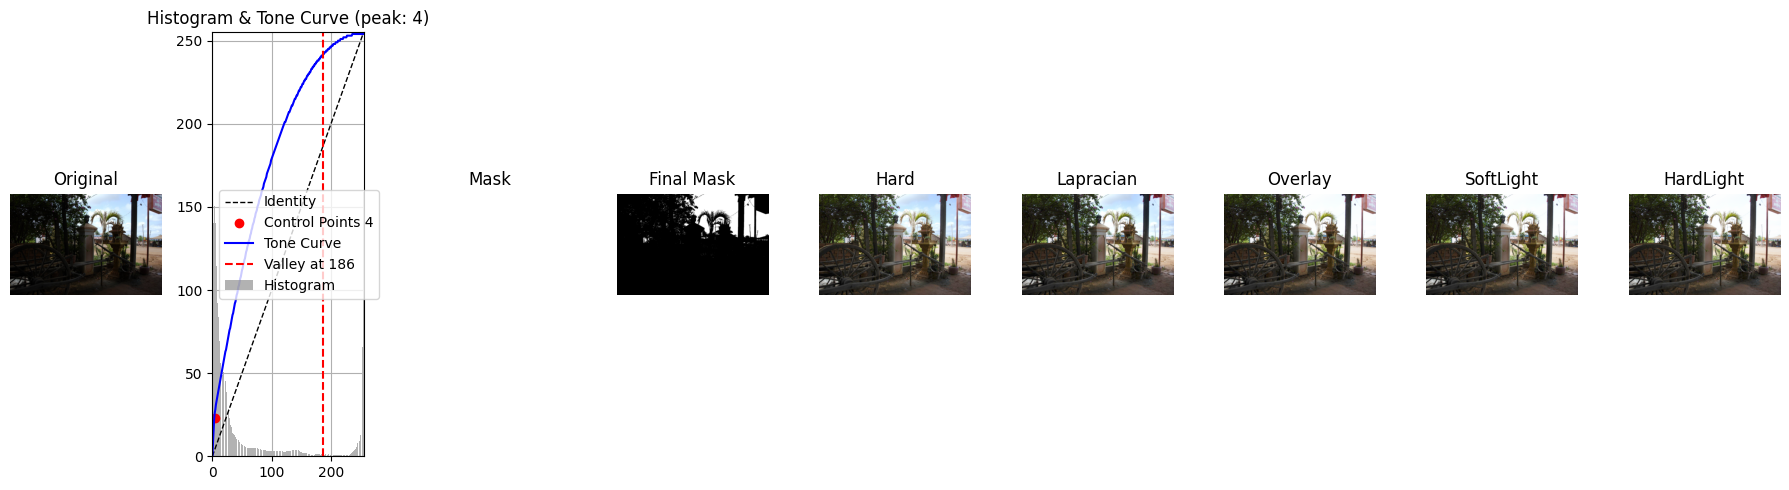

[AdaptiveLift] 95th percentile=201.0, weight=0.43, lift_amount=31


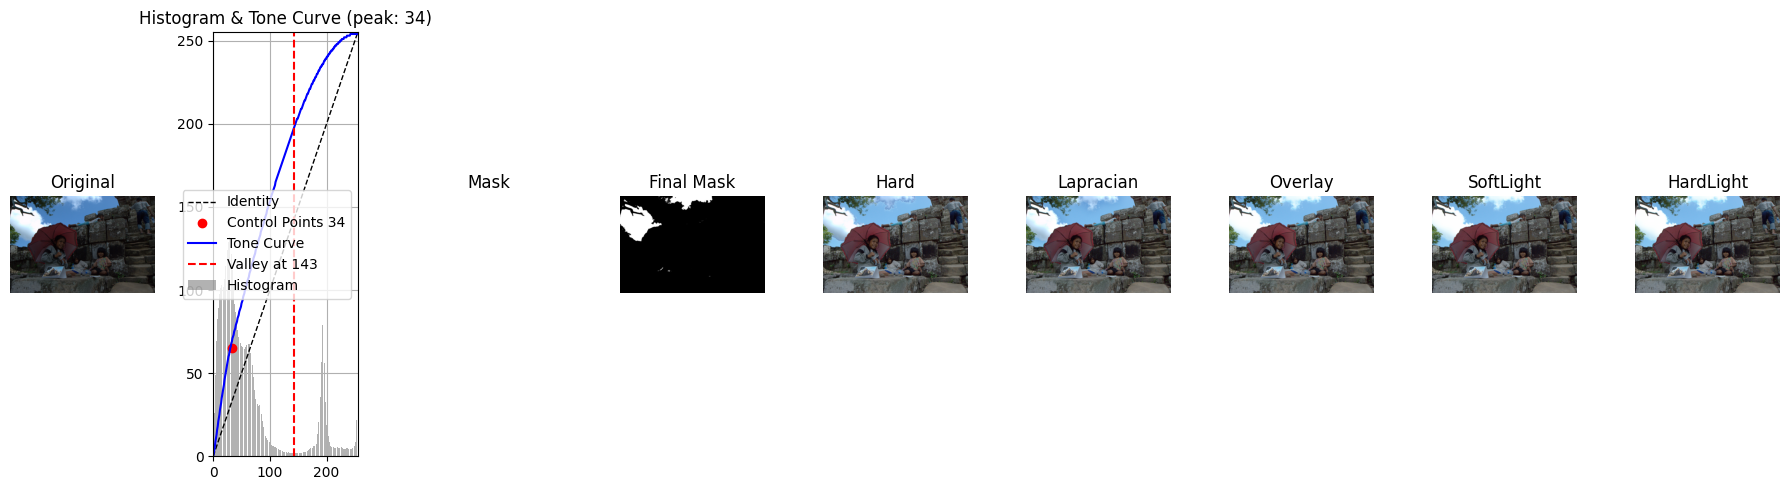

[AdaptiveLift] 95th percentile=114.0, weight=1.00, lift_amount=60


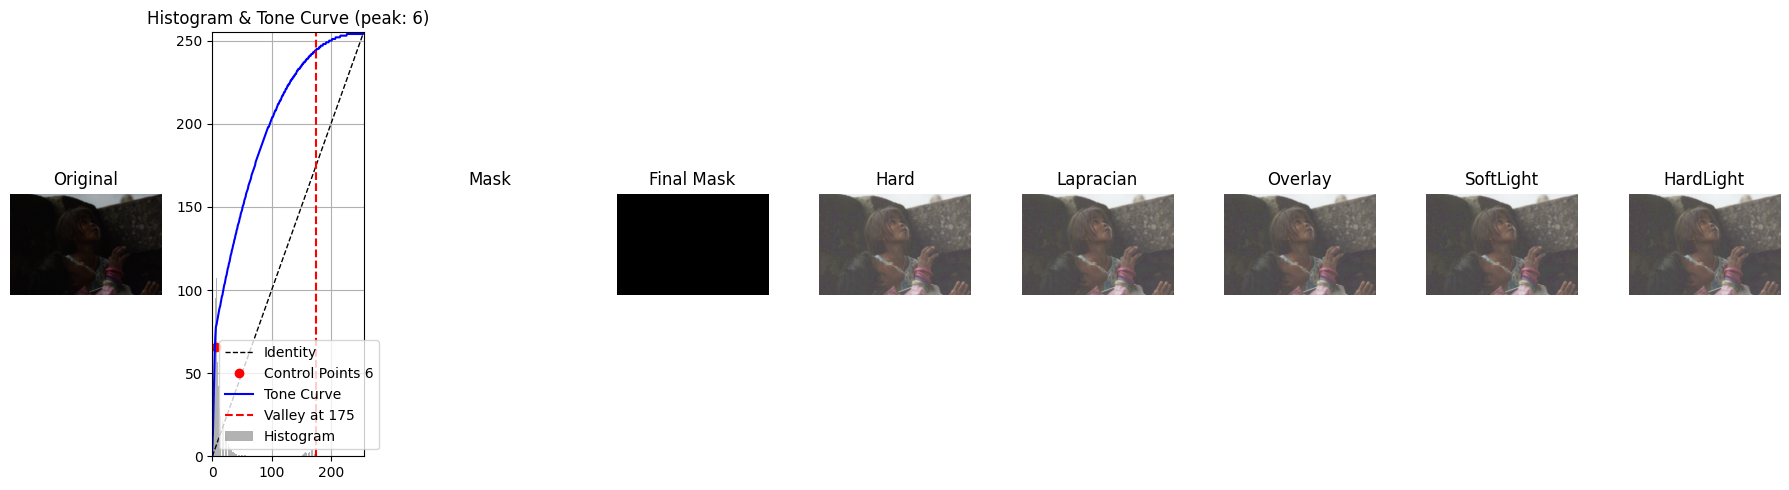

[AdaptiveLift] 95th percentile=144.0, weight=0.87, lift_amount=53


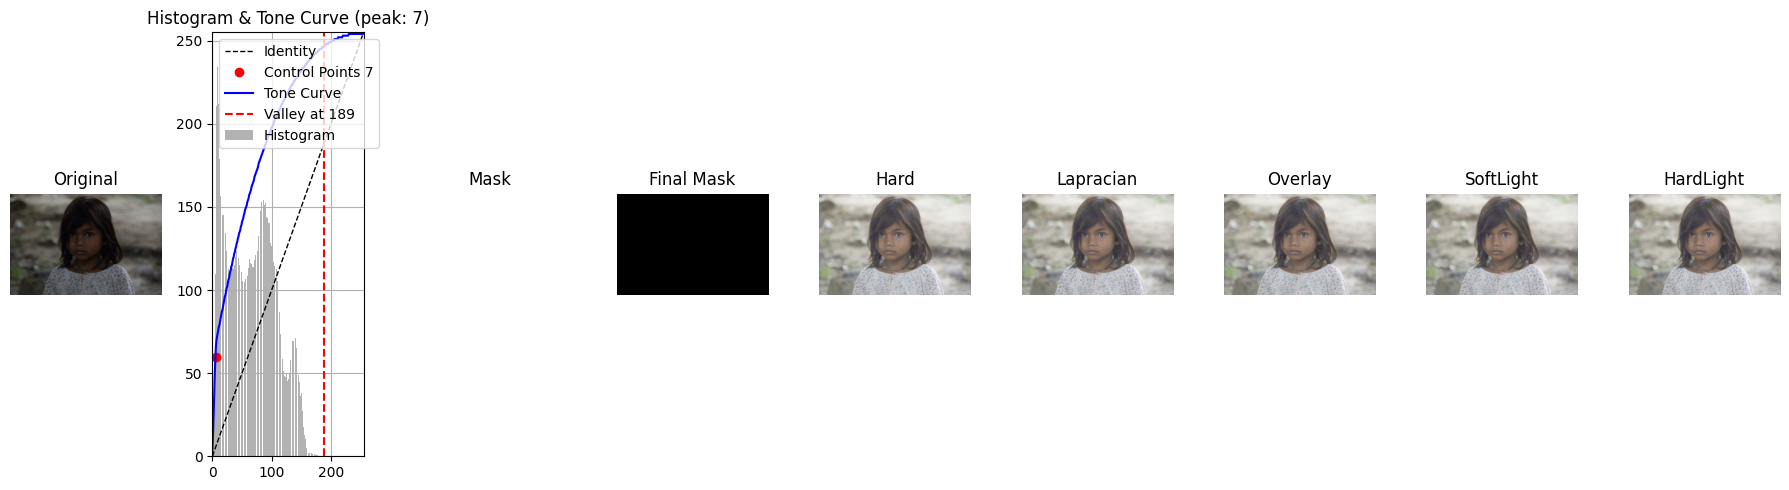

[AdaptiveLift] 95th percentile=206.0, weight=0.39, lift_amount=29


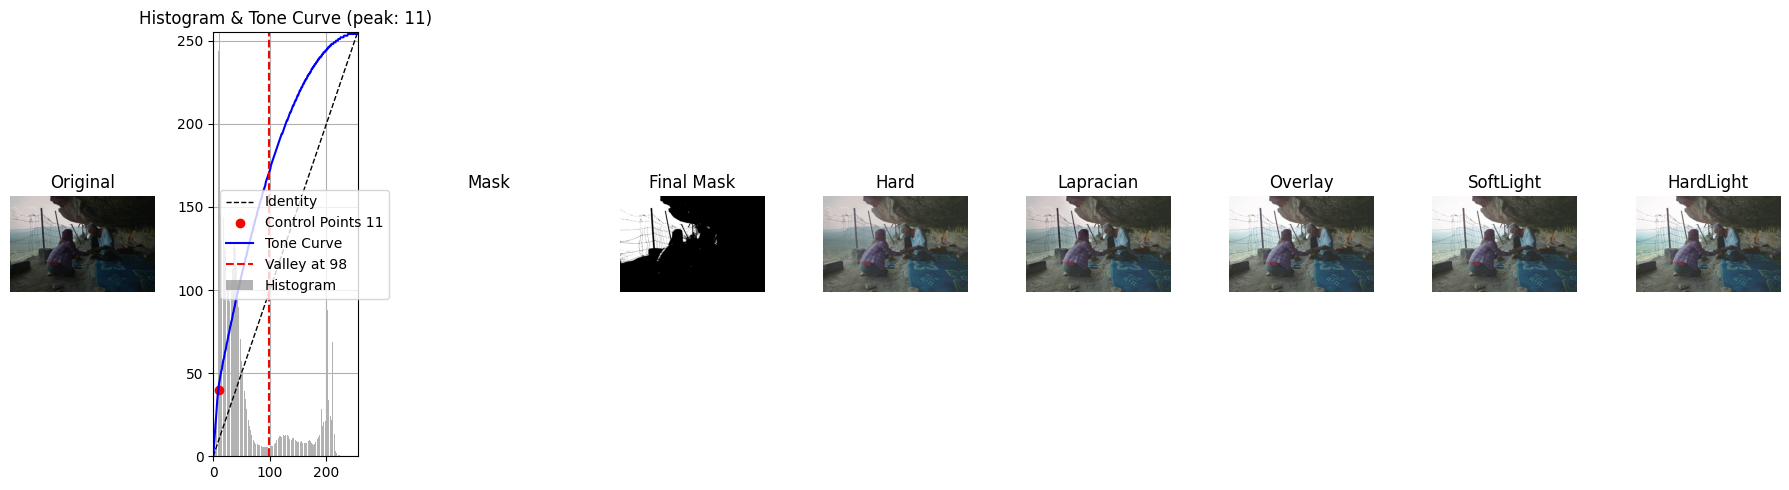

[AdaptiveLift] 95th percentile=113.0, weight=1.00, lift_amount=60


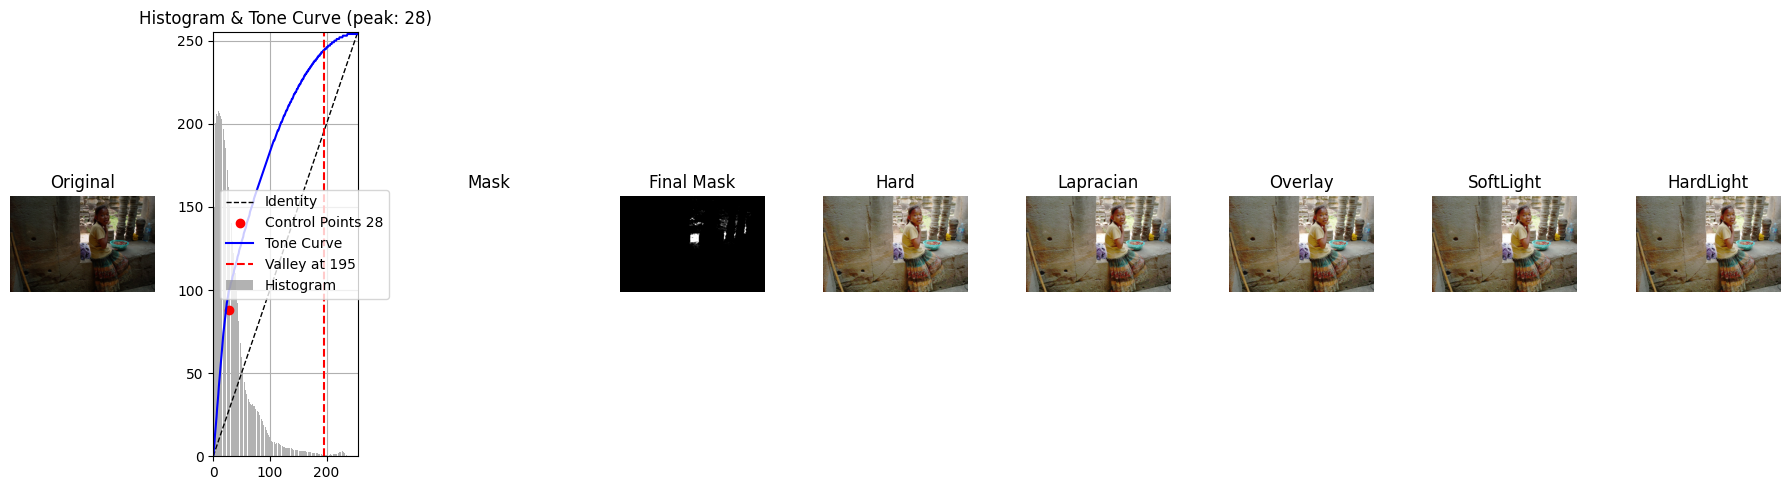

[AdaptiveLift] 95th percentile=211.0, weight=0.35, lift_amount=27


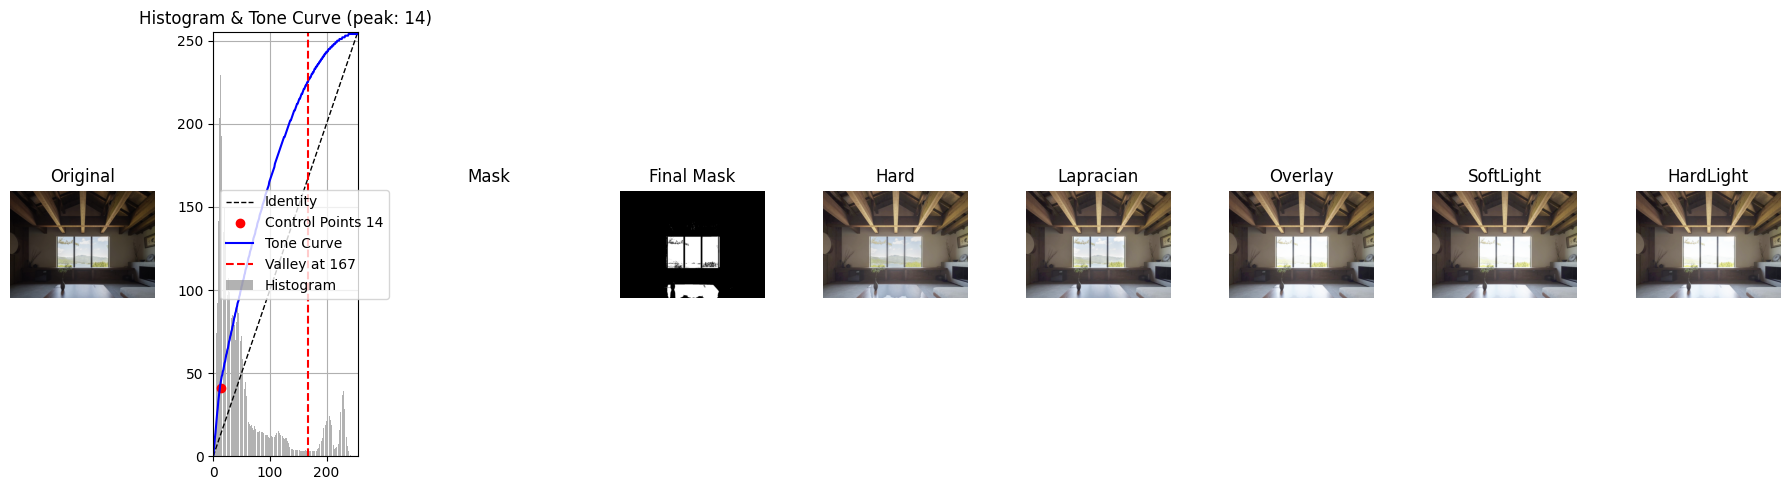

[AdaptiveLift] 95th percentile=255.0, weight=0.00, lift_amount=10


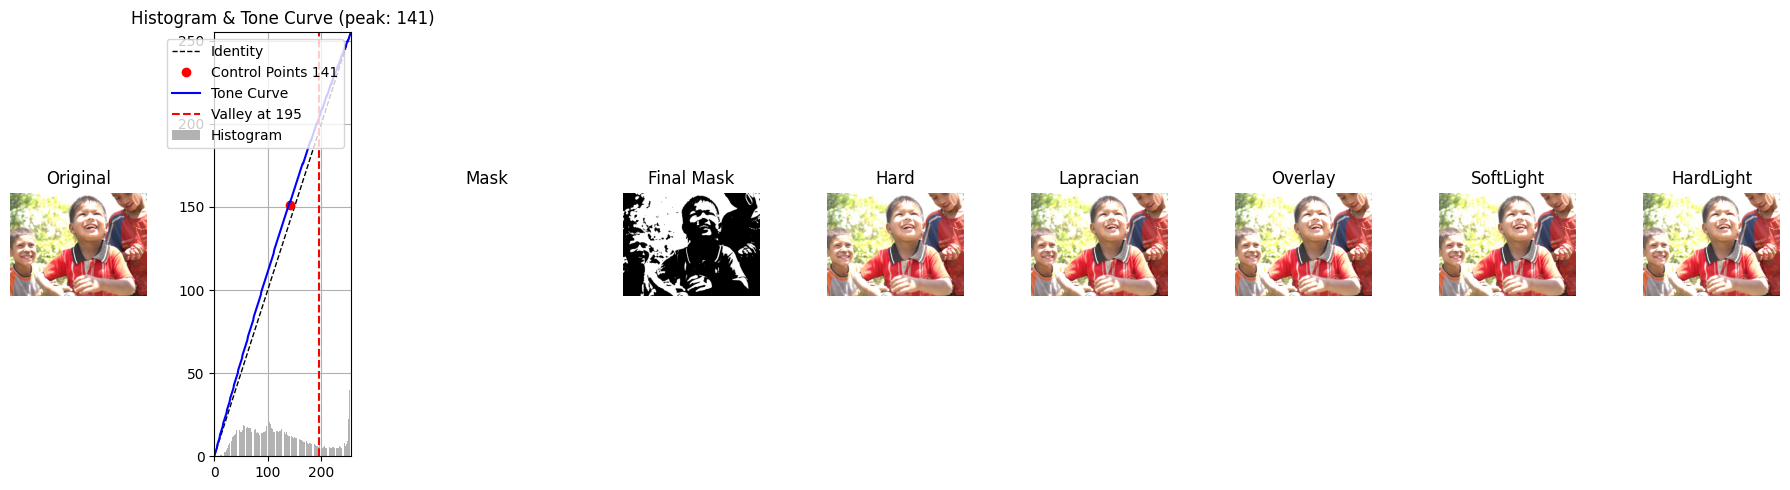

[AdaptiveLift] 95th percentile=255.0, weight=0.00, lift_amount=10


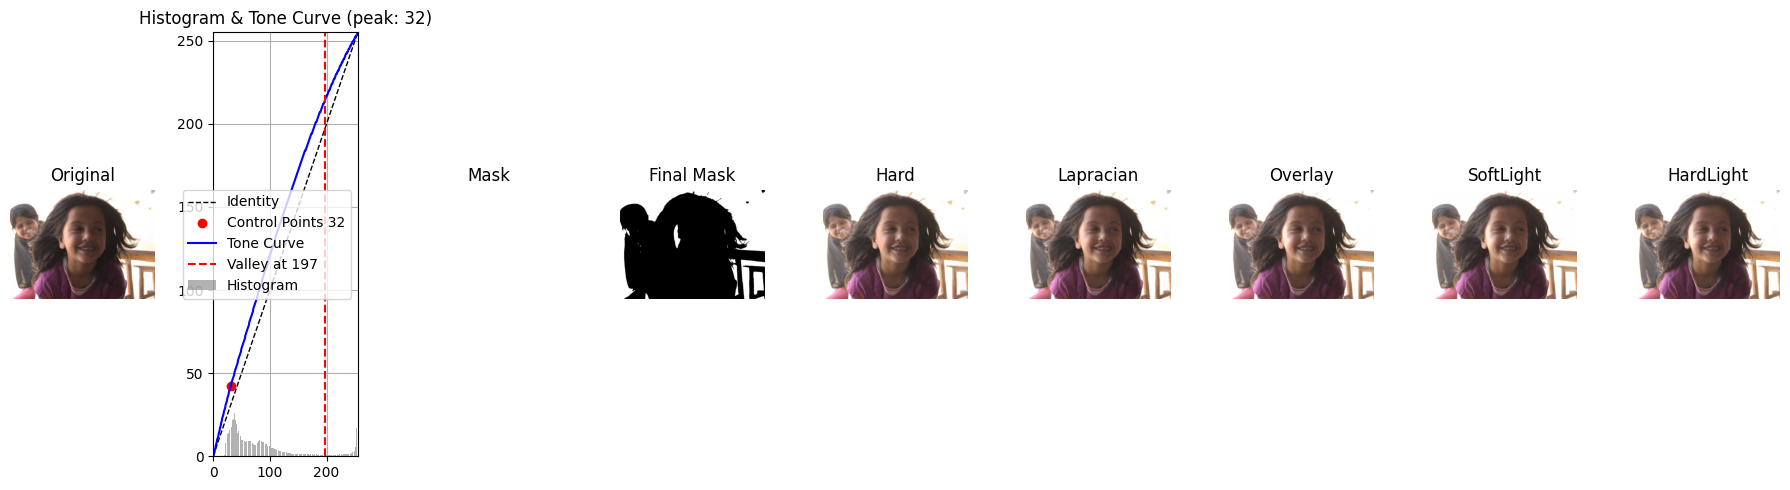

[AdaptiveLift] 95th percentile=174.0, weight=0.64, lift_amount=41
(512, 512)
Use segmentatoin 


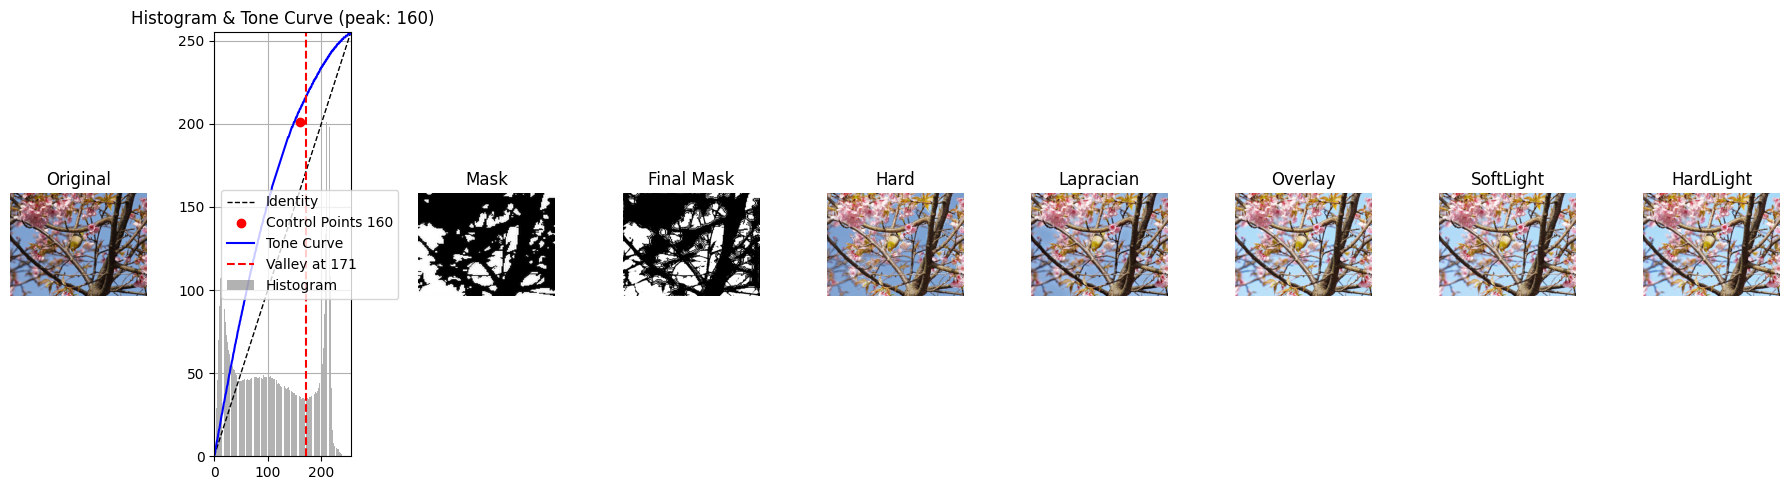

[AdaptiveLift] 95th percentile=221.0, weight=0.27, lift_amount=23


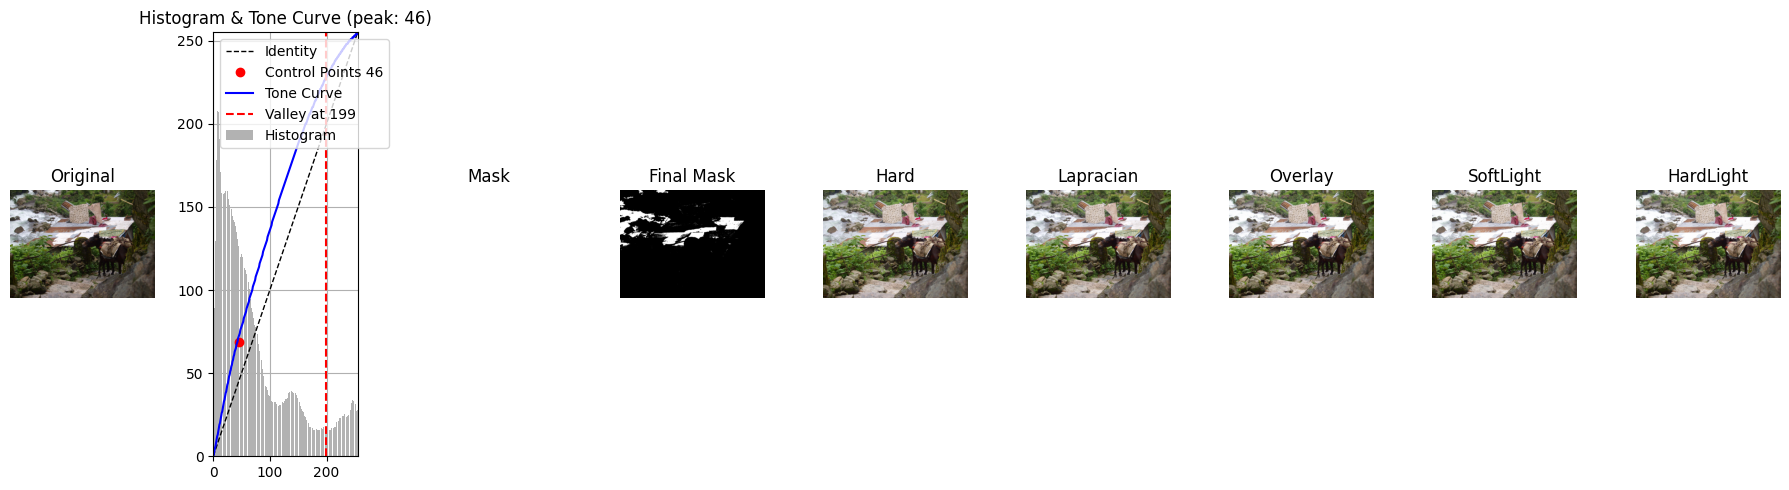

[AdaptiveLift] 95th percentile=194.0, weight=0.48, lift_amount=34


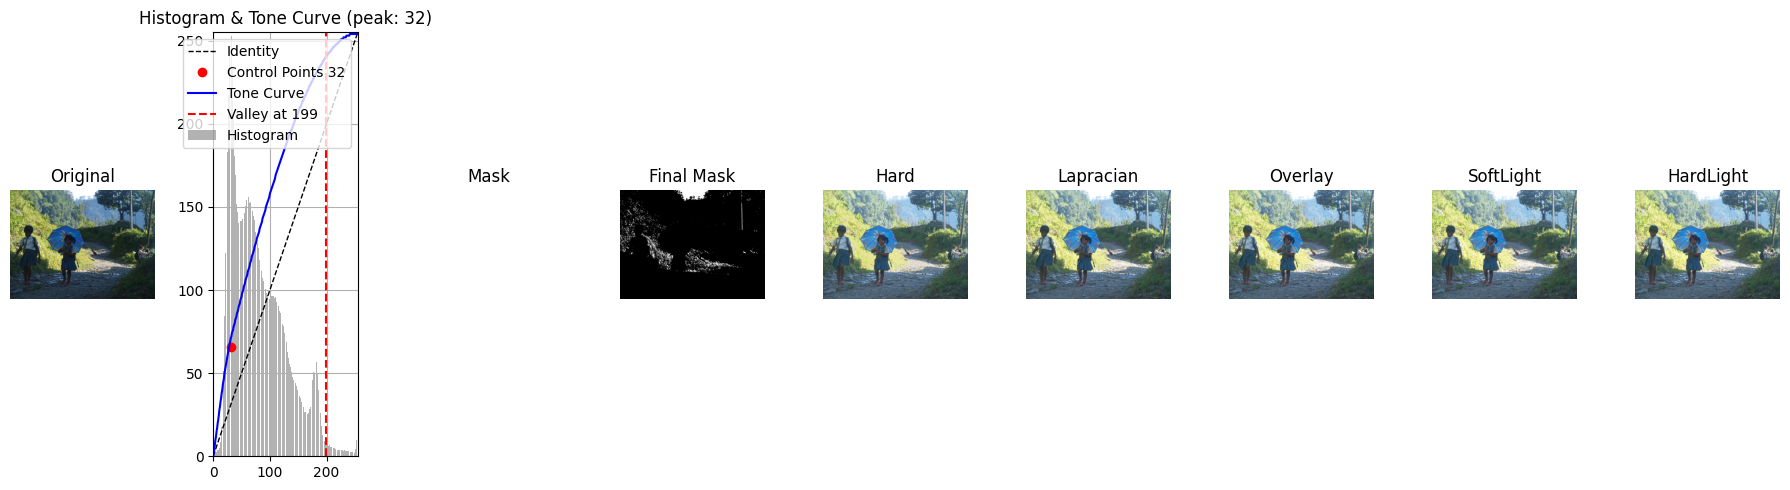

[AdaptiveLift] 95th percentile=181.0, weight=0.58, lift_amount=39


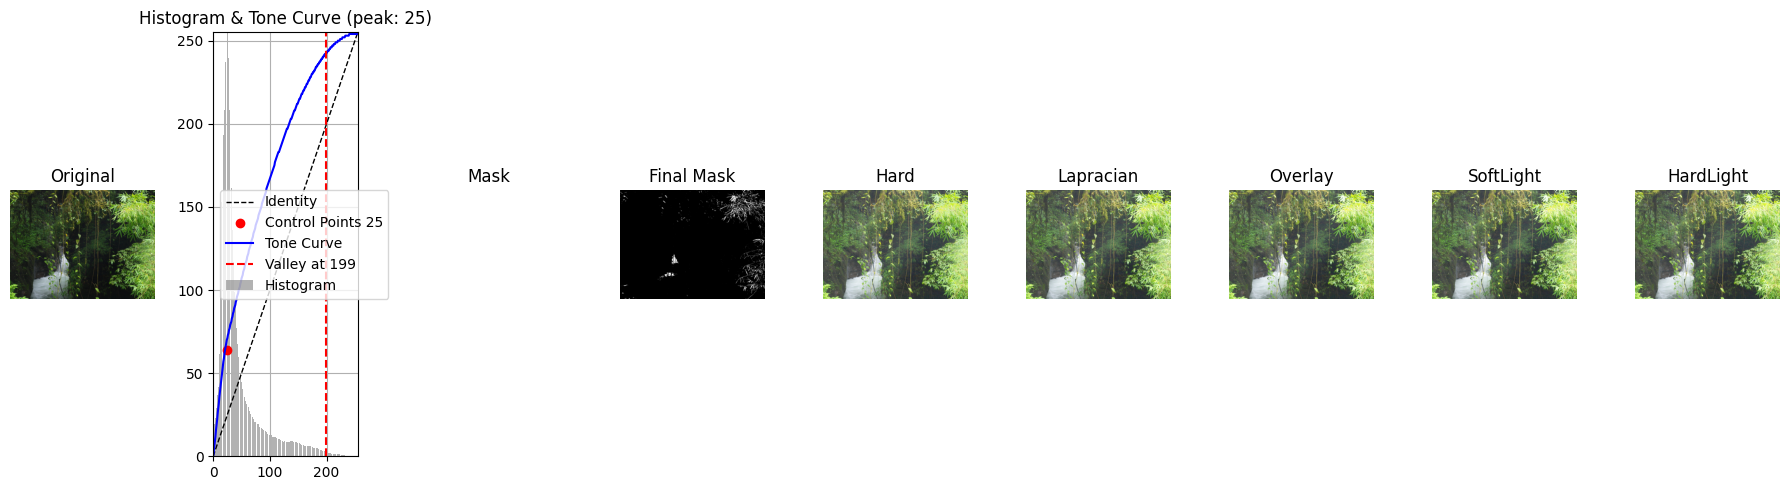

[AdaptiveLift] 95th percentile=247.0, weight=0.06, lift_amount=13
(512, 512)
Use segmentatoin 


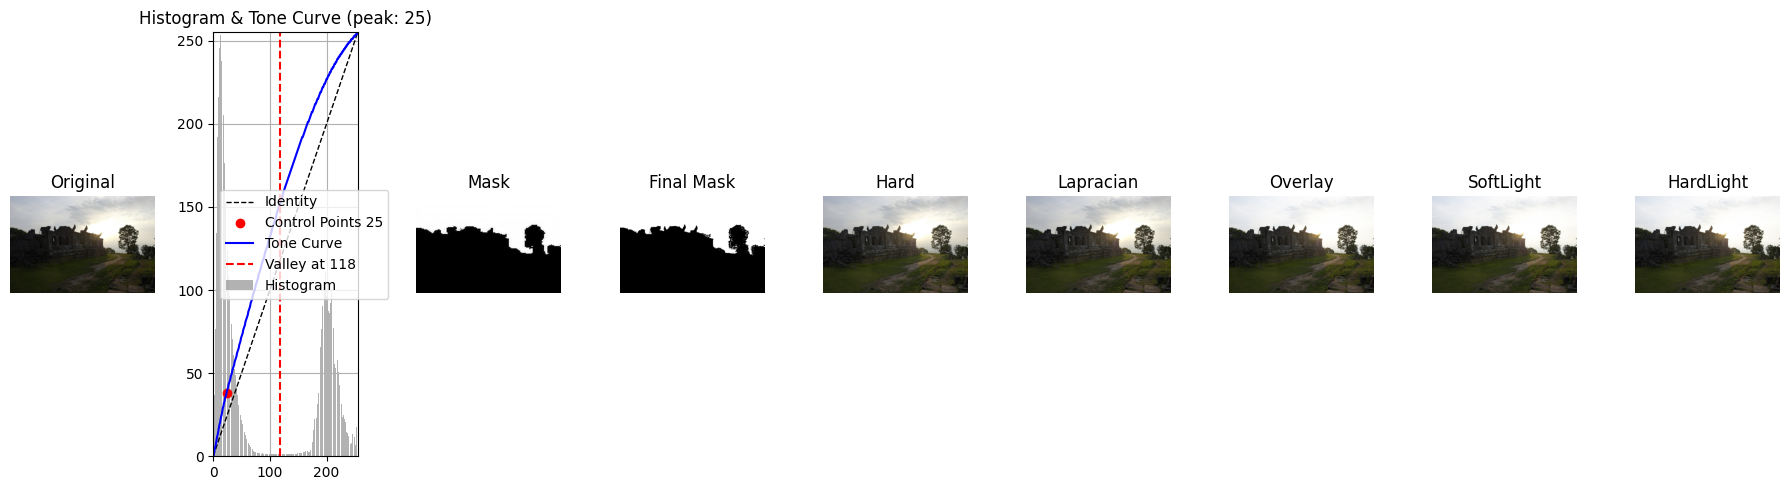

[AdaptiveLift] 95th percentile=210.0, weight=0.35, lift_amount=27
(512, 512)
Use segmentatoin 


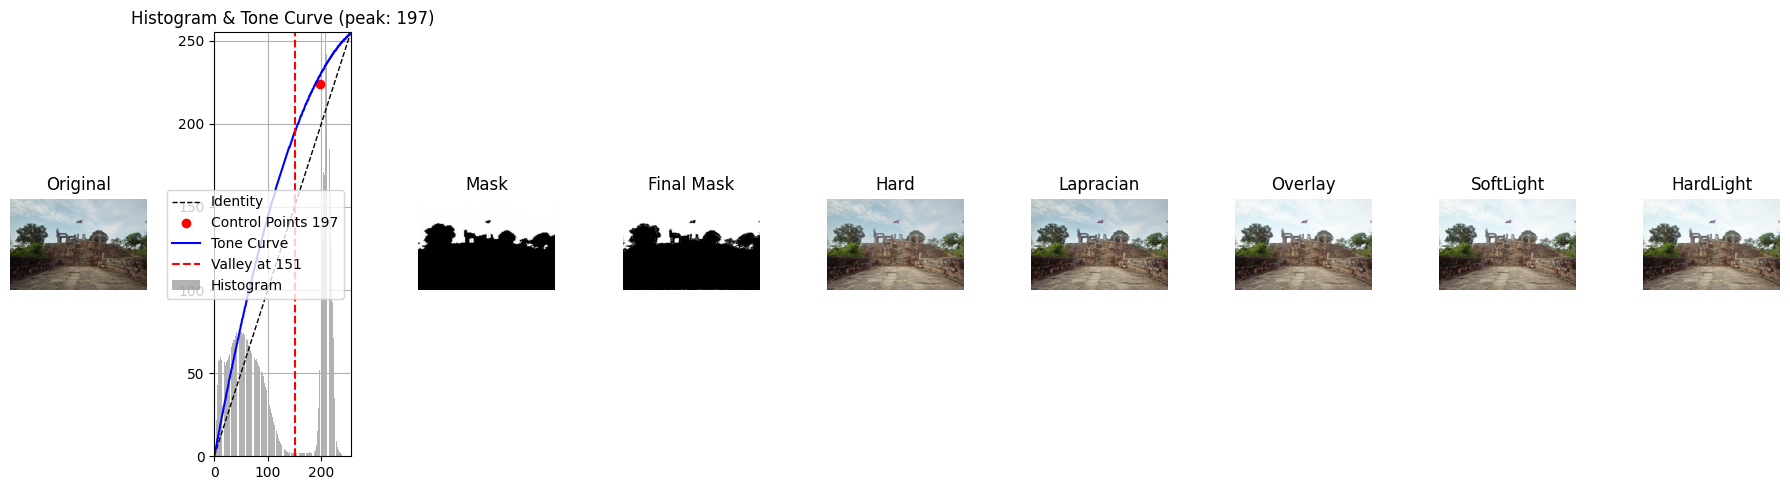

[AdaptiveLift] 95th percentile=213.0, weight=0.33, lift_amount=26
(512, 512)
Use segmentatoin 


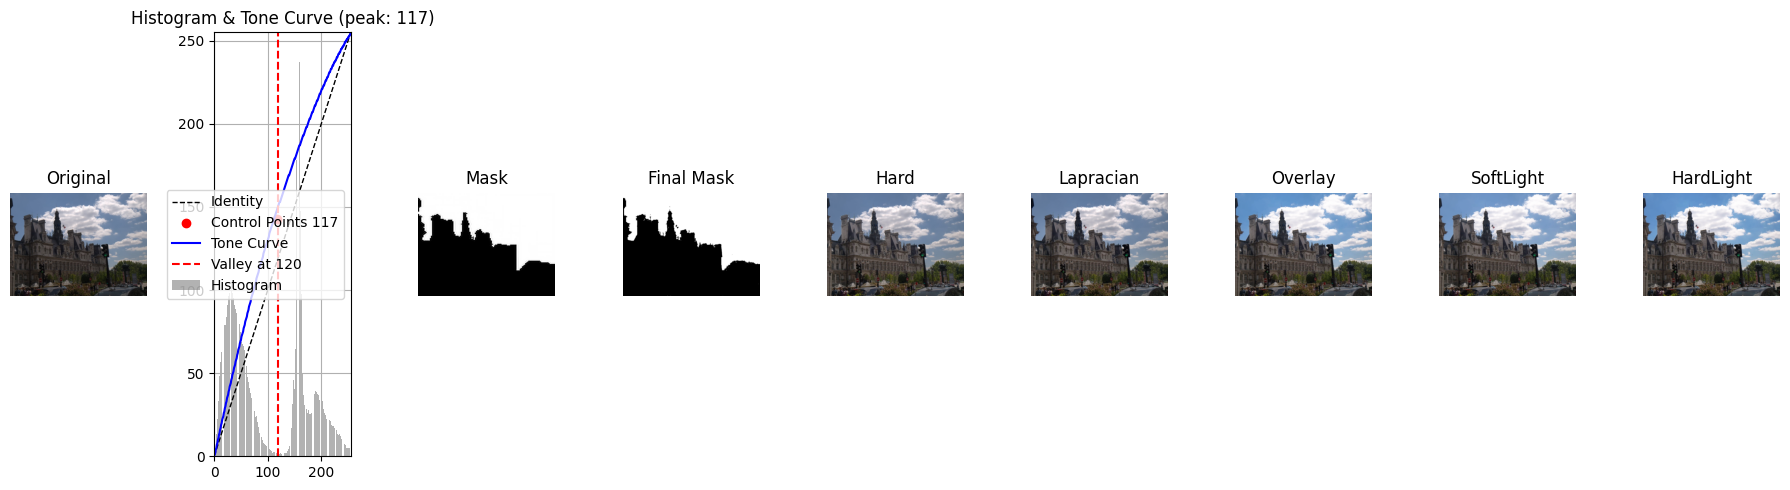

[AdaptiveLift] 95th percentile=254.0, weight=0.01, lift_amount=10
(512, 512)
Use segmentatoin 


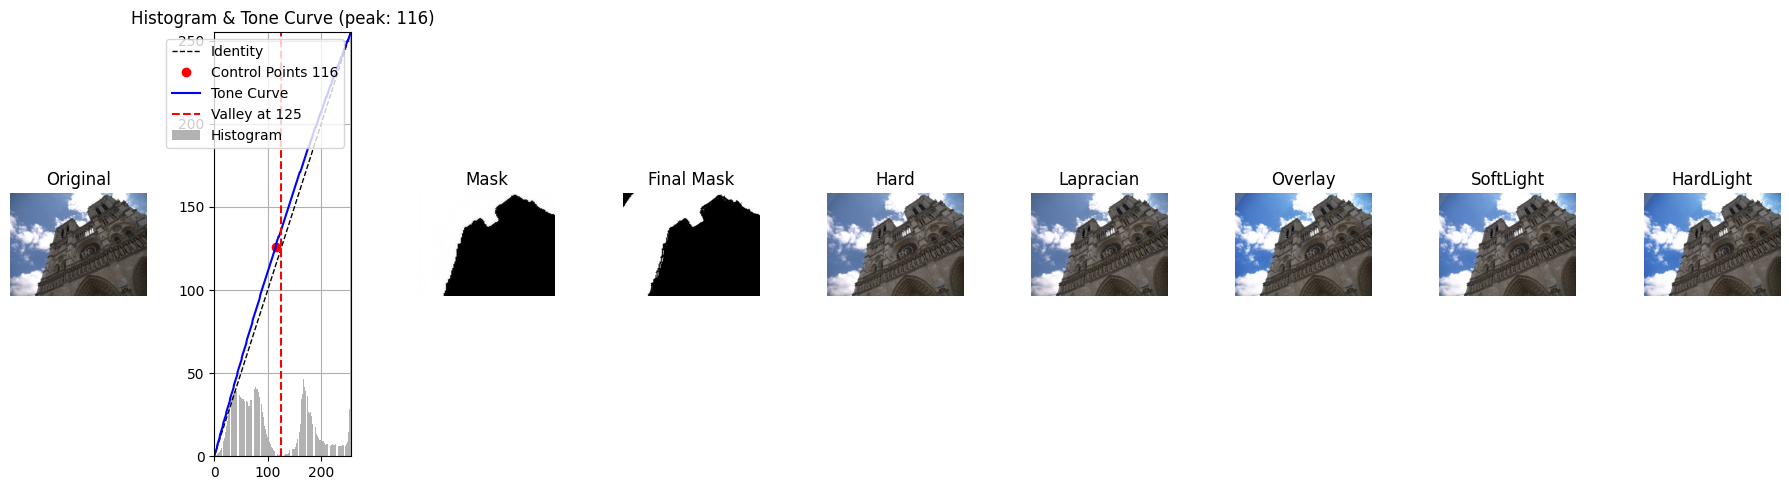

[AdaptiveLift] 95th percentile=226.0, weight=0.23, lift_amount=21
(512, 512)
Use segmentatoin 


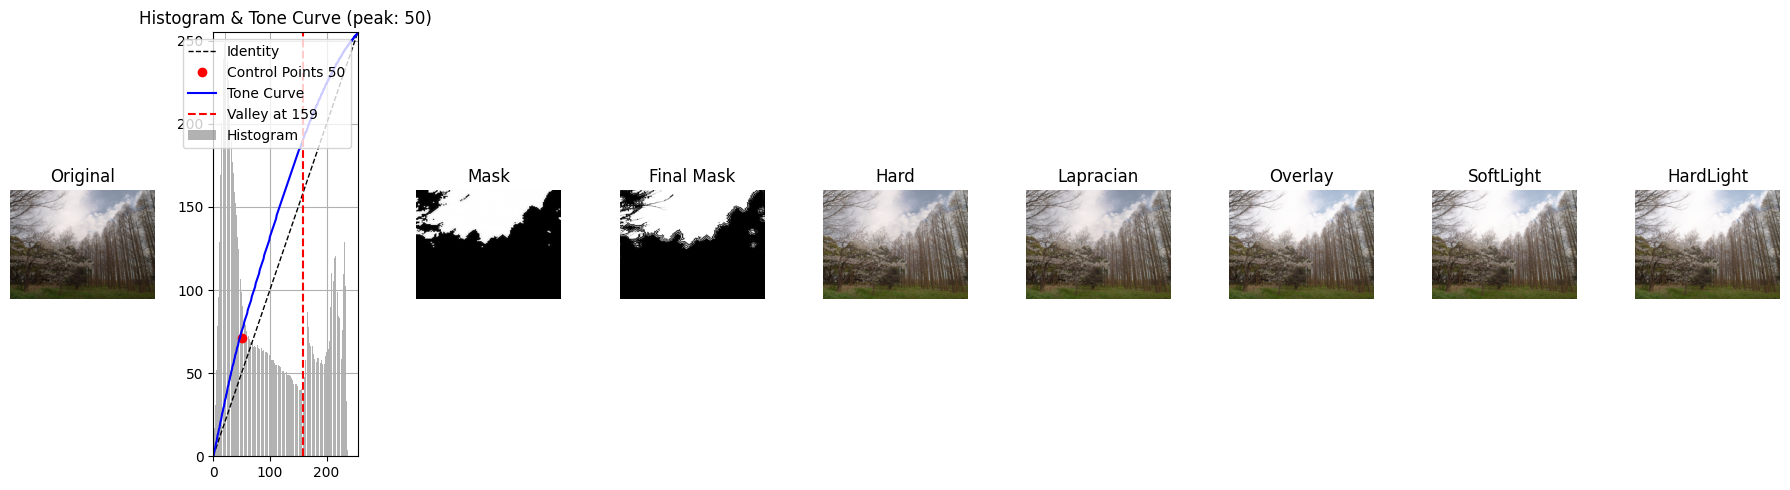

[AdaptiveLift] 95th percentile=206.0, weight=0.39, lift_amount=29
(512, 512)
Use segmentatoin 


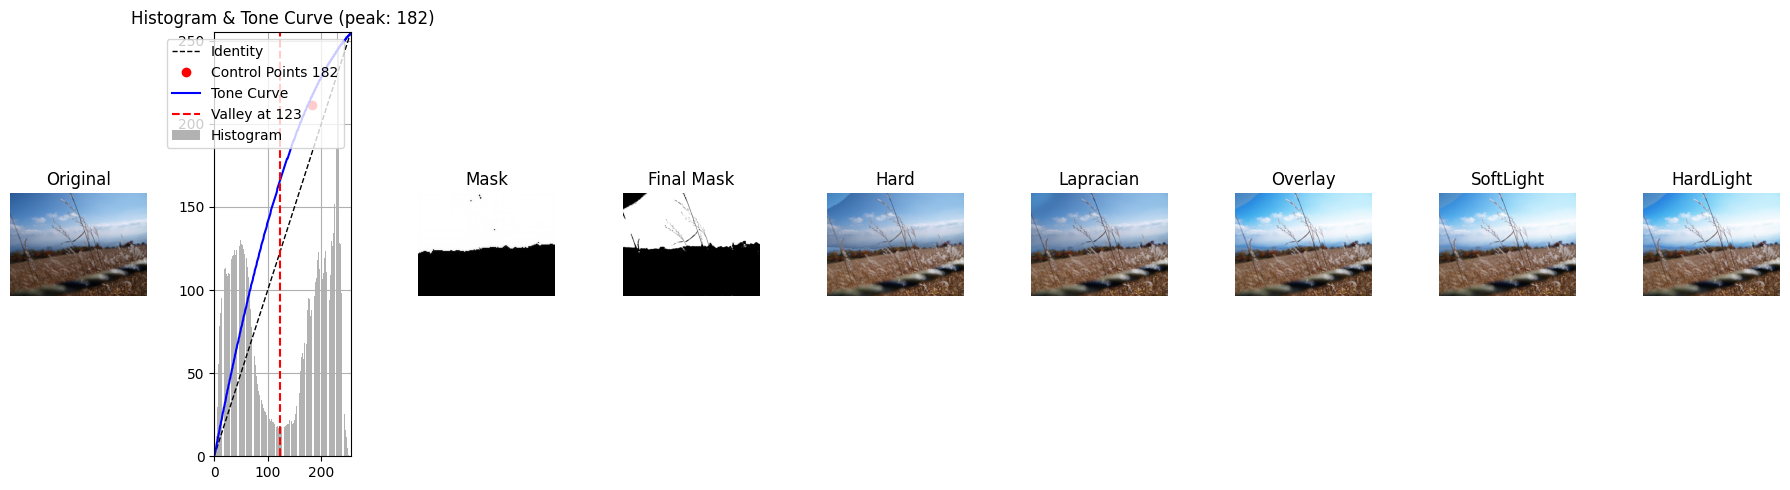

[AdaptiveLift] 95th percentile=184.0, weight=0.56, lift_amount=37


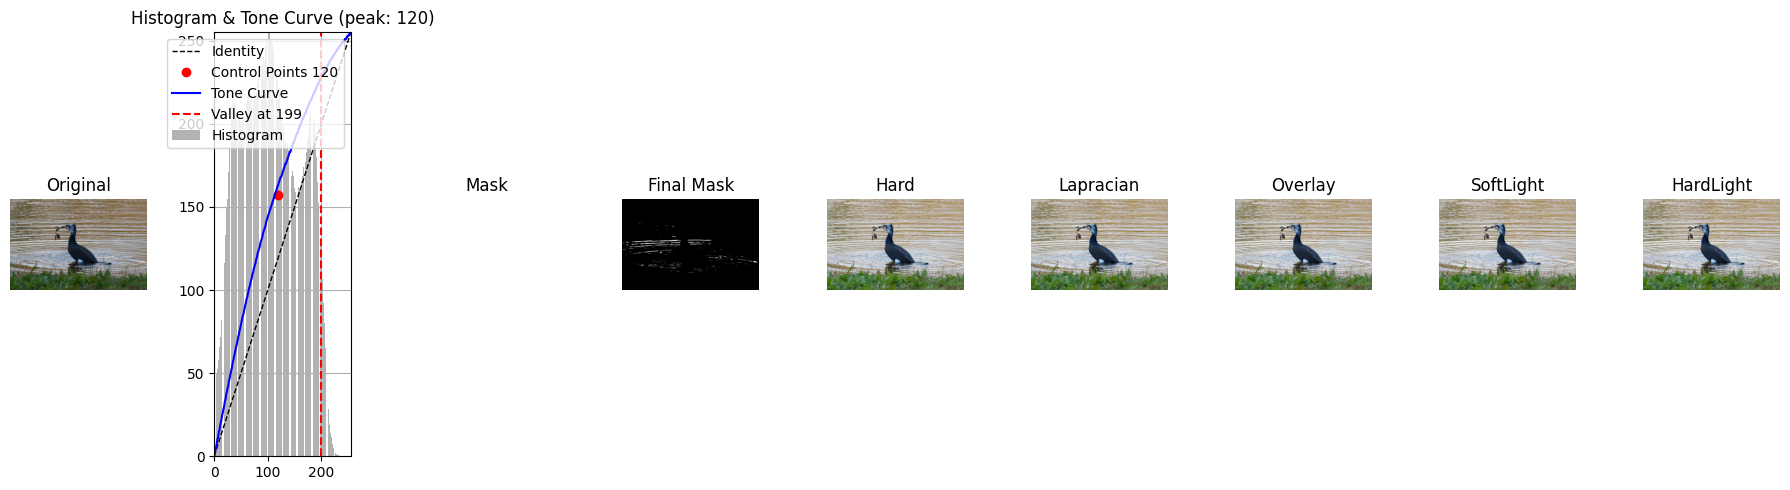

[AdaptiveLift] 95th percentile=227.0, weight=0.22, lift_amount=21


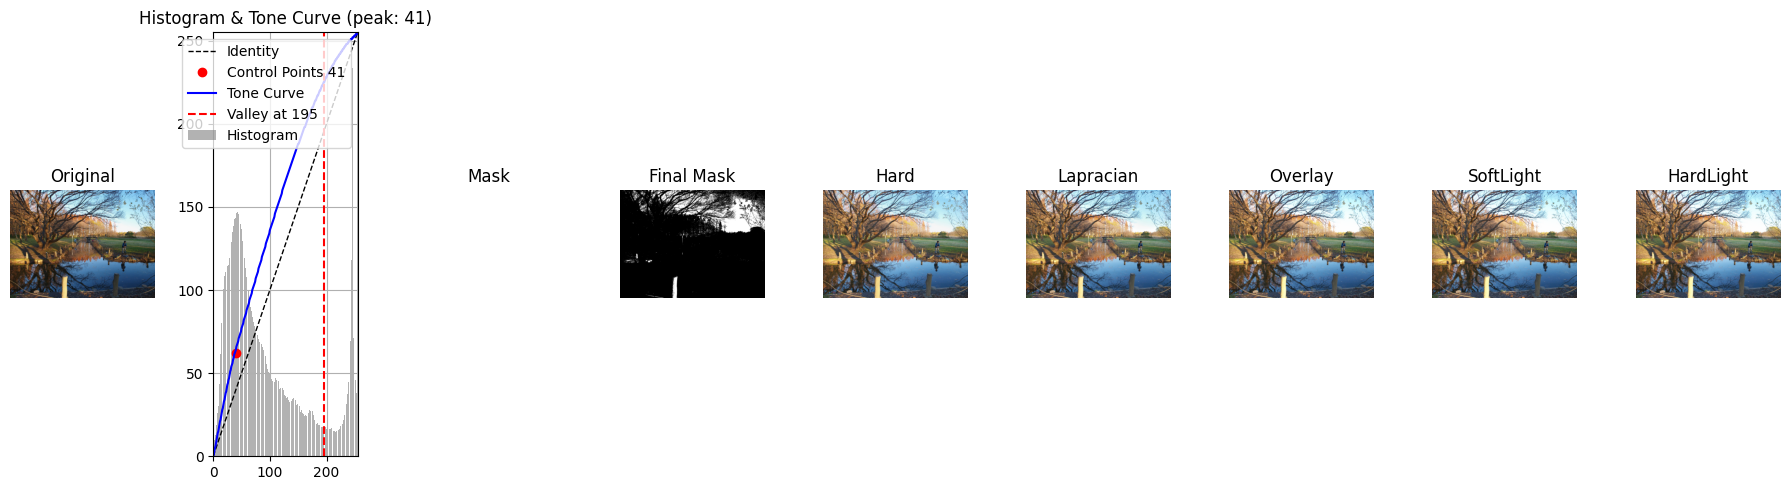

[AdaptiveLift] 95th percentile=208.0, weight=0.37, lift_amount=28


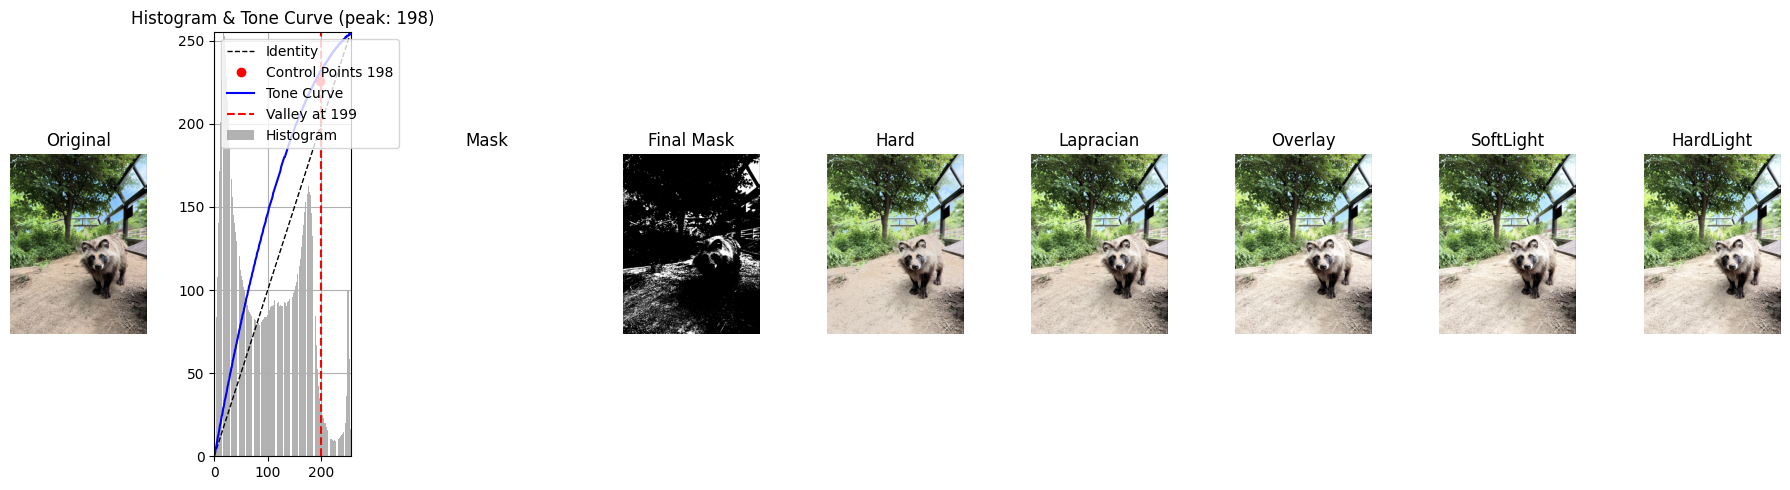

In [157]:
for entry in os.listdir("./inputs"):
#for entry in ["P7016194_Original.JPG"]:
  if entry == "." or entry == "..":
    continue

  # おまじない
  gc.collect()
  torch.cuda.empty_cache()

  # カラー画像の読み込み
  img_path = f"inputs/{entry}"
  img_color = cv2.imread(img_path)

  # 輝度画像に変換（グレースケール）
  peak, hist, lift_amount = calc_image_hist(img_color)

  # とりあえず、明るめと言う意味で1.5倍にする、もっと的確なロジックんにしていいはず
  adjusted_image, lut = apply_tone_curve_by_peak(img_color, peak, lift_amount=lift_amount*1.2)

  # 元画像の谷、画像、ヒストグラム
  valley, gray_mask, hist = find_valley_in_range(img_color, min_val=50, max_val=200)

  # 空のマスク
  try:
    sky_mask = generate_segmentation_mask(img_color, "sky")
    mask = generate_refined_mask(img_color, sky_mask)
    print("Use segmentatoin ")
  except ValueError:
    sky_mask = np.ones_like(gray_mask) * 255
    mask = gray_mask

  blur_mask = cv2.GaussianBlur(mask, (51, 51), sigmaX=2) # 境界をなめらかにするためのBlur

  # アルファ設定
  alpha = mask.astype(np.float32) / 255.0
  alpha_3ch = np.repeat(alpha[..., None], 3, axis=2)

  # ハードマスクブレンド
  hard_blended = hard_mask_blend(img_color, adjusted_image, blur_mask)
  # オーバー例ブレンド
  over_lay_blended = overlay_blend(adjusted_image, img_color, blur_mask)
  # ソフトライト
  soft_right_blended = soft_light_blend(adjusted_image, img_color, blur_mask)
  # ハードライト
  hard_light_blended = hard_light_blend(adjusted_image, img_color, blur_mask)
  # ラプラシアンピラミッド
  lapracian_blended = laplacian_blend_bgr(img_color, adjusted_image, mask, levels=6)

  # タイル上にしてアップスケーリング
  #processed = process_image_with_swinir_parallel(hard_blended)

  # LANCOSで縮小
  #processed = cv2.resize(processed, (original_size[1], original_size[0]), interpolation=cv2.INTER_LANCZOS4)

  # 結果表示
  show_sampled_image_hdr(hist, lut, peak, lift_amount, valley, img_color, sky_mask, mask, hard_blended, lapracian_blended, over_lay_blended, soft_right_blended, hard_light_blended)

  # ファイルに保存
  output_path = "./outputs/" + img_path.split('/')[-1].split('.')[0]
  cv2.imwrite(output_path + "_mask.png", gray_mask)
  #cv2.imwrite(output_path + "_hdr.jpg", processed)
  cv2.imwrite(output_path + "_hdr_hard.jpg", hard_blended)
  cv2.imwrite(output_path + "_hdr_lapracian.jpg", lapracian_blended)
  cv2.imwrite(output_path + "_hdr_over_lay.jpg", over_lay_blended)
  cv2.imwrite(output_path + "_hdr_soft_light.jpg", soft_right_blended)
  cv2.imwrite(output_path + "_hdr_hard_light.jpg", hard_light_blended)
